In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

%matplotlib inline

In [71]:
df = pd.read_csv("../input/HR_comma_sep.csv")

In [72]:
df.shape

(14999, 10)

In [73]:
# 统计是否有空值
# df.isnull().any()

# 统计空值个数
# df.isnull().sum()

# 统计空值百分比
df.isnull().sum()/df.shape[0]

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

In [74]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [75]:
# 重命名产生新对象， ===需要重新赋值==
df = df.rename(columns={'satisfaction_level':'satisfaction','last_evaluation': 'evaluation', 'number_project':'projectCount',
                   'average_montly_hours':'averageMonthlyHours',
         'time_spend_company':'yearAtCompany', 'Work_accident':'wordAccident', 'left':'turnover', 'promotion_last_5years':'promotion',
          'sales': 'department'})

In [76]:
front  = df['turnover']

# inplace 是否替换原对象
df.drop(labels = ['turnover'], axis=1, inplace=True)
df.insert(0 , 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearAtCompany,wordAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [77]:
# 在职/离职
df.turnover.value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [78]:
df.turnover.value_counts()/df.shape[0]

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [79]:
# 统计每个字段
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearAtCompany,wordAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [80]:
df.turnover.describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: turnover, dtype: float64

In [81]:
turnover_groupby = df.groupby(['turnover'])

In [82]:
# 查看不同分类下，均值 ==可以区分特征显著性==
turnover_groupby.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearAtCompany,wordAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearAtCompany,wordAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
wordAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


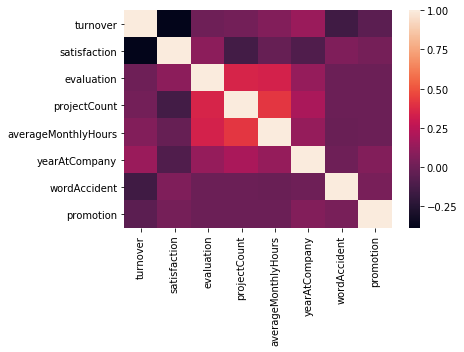

In [83]:
# 相关性，默认使用
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

corr